### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

### Reading the Dataset

In [2]:
df = pd.read_csv(r"D:\Downloads\Data Science\Analytics_Vidya\Dataset\Black Friday Sales\train.csv")
test_data = pd.read_csv(r"D:\Downloads\Data Science\Analytics_Vidya\Dataset\Black Friday Sales\test.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Filling Null Values of Train Data

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
mode = df['Product_Category_2'].mode() 
df['Product_Category_2'].fillna(mode[0], inplace =True)

In [7]:
mode = df['Product_Category_3'].mode() 
df['Product_Category_3'].fillna(mode[0], inplace =True)

In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Splitting the Train Data( i.e df ) into train and test (80% of df is train and 20% of df is test)

In [9]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.2)

In [10]:
print(train.shape,test.shape)

(440054, 12) (110014, 12)


### Reading the Submission File

In [11]:
submission = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\Black Friday Sales\sample_submission.csv')

In [12]:
submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


### Storing the values of the user id and product id of test data into the submission data

In [13]:
submission['User_ID'] = test_data['User_ID']
submission['Product_ID'] = test_data['Product_ID']

In [14]:
submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [15]:
test_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [16]:
mode = test_data['Product_Category_2'].mode() 
test_data['Product_Category_2'].fillna(mode[0], inplace =True)

In [17]:
mode = test_data['Product_Category_3'].mode() 
test_data['Product_Category_3'].fillna(mode[0], inplace =True)

In [18]:
test_data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

## EDA

### Age vs Purchase

In [19]:
train.groupby('Age').Purchase.sum().plot(kind='bar')

In [20]:
age_purchase = train.groupby('Age').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
age_purchase

{'Purchase': {'0-17': 108246056,
  '18-25': 730920234,
  '26-35': 1625274636,
  '36-45': 818885843,
  '46-50': 336763890,
  '51-55': 294778927,
  '55+': 160174252}}

#### It can be observed that the customers of the age between 26-35 purchase more products.

### City vs Purchase

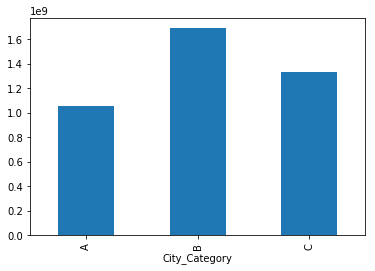

In [21]:
train.groupby('City_Category').Purchase.sum().plot(kind='bar')

In [22]:
city_purchase = train.groupby('City_Category').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
city_purchase

{'Purchase': {'A': 1052236871, 'B': 1692821581, 'C': 1329985386}}

### Marital Status vs Purchase

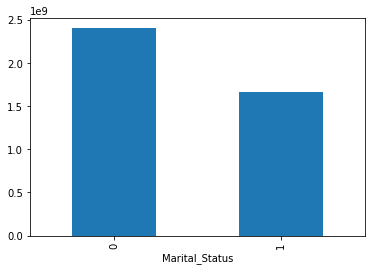

In [23]:
train.groupby('Marital_Status').Purchase.sum().plot(kind='bar')

In [24]:
married_purchase = train.groupby('Marital_Status').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
married_purchase

{'Purchase': {0: 2406218946, 1: 1668824892}}

### Product Category 1 vs Purchase

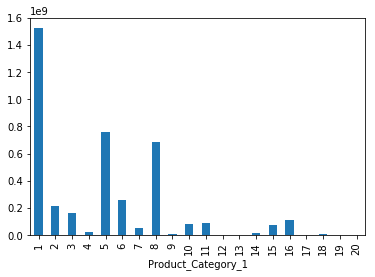

In [25]:
train.groupby('Product_Category_1').Purchase.sum().plot(kind='bar')

In [26]:
product_one = train.groupby('Product_Category_1').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
product_one

{'Purchase': {1: 1524769687,
  2: 215018634,
  3: 162167590,
  4: 22012920,
  5: 756095833,
  6: 260250437,
  7: 49669025,
  8: 682910302,
  9: 5098779,
  10: 80420376,
  11: 90770223,
  12: 4226230,
  13: 3212242,
  14: 15870985,
  15: 74538072,
  16: 115144319,
  17: 4556213,
  18: 7509807,
  19: 47176,
  20: 754988}}

### Product Category 2 vs Purchase

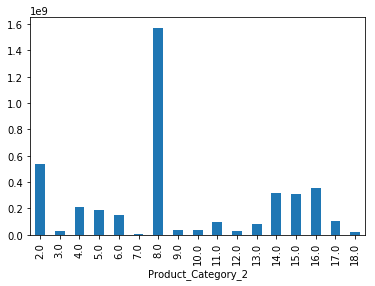

In [27]:
train.groupby('Product_Category_2').Purchase.sum().plot(kind='bar')

In [28]:
product_two = train.groupby('Product_Category_2').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
product_two

{'Purchase': {2.0: 535203781,
  3.0: 25968576,
  4.0: 209026207,
  5.0: 189482665,
  6.0: 151199698,
  7.0: 3392083,
  8.0: 1574413326,
  9.0: 33265569,
  10.0: 38315224,
  11.0: 99631102,
  12.0: 30998002,
  13.0: 81738774,
  14.0: 312940747,
  15.0: 312407142,
  16.0: 355978191,
  17.0: 100534083,
  18.0: 20548668}}

### Product Category 3 vs Purchase

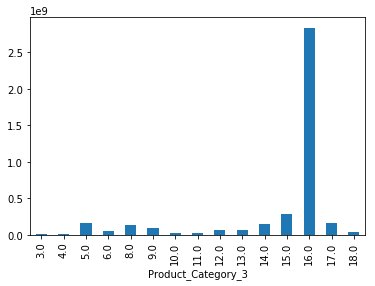

In [29]:
train.groupby('Product_Category_3').Purchase.sum().plot(kind='bar')

In [30]:
product_three = train.groupby('Product_Category_3').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
product_three

{'Purchase': {3.0: 6701972,
  4.0: 14552428,
  5.0: 160989220,
  6.0: 51969243,
  8.0: 130516783,
  9.0: 96139838,
  10.0: 18653858,
  11.0: 17283911,
  12.0: 64414484,
  13.0: 57801918,
  14.0: 148166488,
  15.0: 275967281,
  16.0: 2834361882,
  17.0: 156984649,
  18.0: 40539883}}

### Occupation vs Purchase

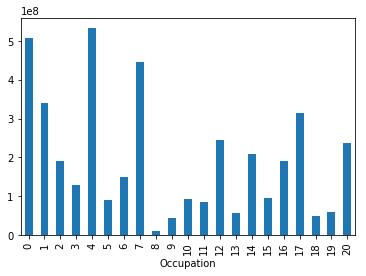

In [31]:
train.groupby('Occupation').Purchase.sum().plot(kind='bar')

In [32]:
occ_purchase = train.groupby('Occupation').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
occ_purchase

{'Purchase': {0: 507913623,
  1: 340178024,
  2: 189842740,
  3: 129077162,
  4: 533534789,
  5: 90154820,
  6: 150824351,
  7: 444640593,
  8: 11481745,
  9: 43063236,
  10: 92777510,
  11: 85180474,
  12: 244881024,
  13: 57825135,
  14: 208376253,
  15: 94988803,
  16: 191323808,
  17: 315195887,
  18: 48358538,
  19: 58988955,
  20: 236436368}}

### Stay in Current City vs Purchase

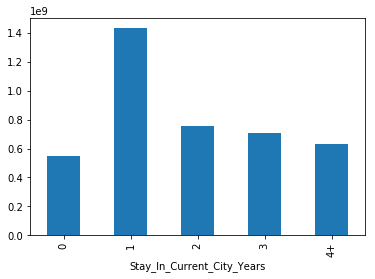

In [33]:
train.groupby('Stay_In_Current_City_Years').Purchase.sum().plot(kind='bar')

In [34]:
stay_in_city_purchase = train.groupby('Stay_In_Current_City_Years').agg({'Purchase' : 'sum'}).apply(lambda x : x.tolist()).to_dict()
stay_in_city_purchase

{'Purchase': {'0': 545316978,
  '1': 1433099387,
  '2': 759138599,
  '3': 707788090,
  '4+': 629700784}}

## Feature Engineering

In [35]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### City , Age , Gender , Marital Status , Occupation , Product Category1 , Product Category2 , Product Category3 -Wise Average Purchase

In [36]:
city_purchase = train.groupby('City_Category').agg({'Purchase':'mean'}).reset_index()
city_purchase.columns = ['City_Category','CityCategory_Purchase']
train = pd.merge(train,city_purchase,how='left',on=['City_Category'])
test = pd.merge(test,city_purchase,how='left',on=['City_Category'])
test_data = pd.merge(test_data,city_purchase,how='left',on=['City_Category'])

In [37]:
age_purch = train.groupby('Age').agg({'Purchase':'mean'}).reset_index()
age_purch.columns = ['Age','Age_Purchase']
train = pd.merge(train,age_purch,how='left',on=['Age'])
test = pd.merge(test,age_purch,how='left',on=['Age'])
test_data = pd.merge(test_data,age_purch,how='left',on=['Age'])

In [38]:
gender_purch = train.groupby('Gender').agg({'Purchase':'mean'}).reset_index()
gender_purch.columns = ['Gender','Gender_Purchase']
train = pd.merge(train,gender_purch,how='left',on=['Gender'])
test = pd.merge(test,gender_purch,how='left',on=['Gender'])
test_data = pd.merge(test_data,gender_purch,how='left',on=['Gender'])

In [39]:
marital_purch = train.groupby('Marital_Status').agg({'Purchase':'mean'}).reset_index()
marital_purch.columns = ['Marital_Status','Marital_Status_Purchase']
train = pd.merge(train,marital_purch,how='left',on=['Marital_Status'])
test = pd.merge(test,marital_purch,how='left',on=['Marital_Status'])
test_data = pd.merge(test_data,marital_purch,how='left',on=['Marital_Status'])

In [40]:
occ_purch = train.groupby('Occupation').agg({'Purchase':'mean'}).reset_index()
occ_purch.columns = ['Occupation','Occupation_Purchase']
train = pd.merge(train,occ_purch,how='left',on=['Occupation'])
test = pd.merge(test,occ_purch,how='left',on=['Occupation'])
test_data = pd.merge(test_data,occ_purch,how='left',on=['Occupation'])

In [41]:
prod1_purch = train.groupby('Product_Category_1').agg({'Purchase':'mean'}).reset_index()
prod1_purch.columns = ['Product_Category_1','Prod_Cat1_Purchase']
train = pd.merge(train,prod1_purch,how='left',on=['Product_Category_1'])
test = pd.merge(test,prod1_purch,how='left',on=['Product_Category_1'])
test_data = pd.merge(test_data,prod1_purch,how='left',on=['Product_Category_1'])

In [42]:
prod2_purch = train.groupby('Product_Category_2').agg({'Purchase':'mean'}).reset_index()
prod2_purch.columns = ['Product_Category_2','Prod_Cat2_Purchase']
train = pd.merge(train,prod2_purch,how='left',on=['Product_Category_2'])
test = pd.merge(test,prod2_purch,how='left',on=['Product_Category_2'])
test_data = pd.merge(test_data,prod2_purch,how='left',on=['Product_Category_2'])

In [43]:
prod3_purch = train.groupby('Product_Category_3').agg({'Purchase':'mean'}).reset_index()
prod3_purch.columns = ['Product_Category_3','Prod_Cat3_Purchase']
train = pd.merge(train,prod3_purch,how='left',on=['Product_Category_3'])
test = pd.merge(test,prod3_purch,how='left',on=['Product_Category_3'])
test_data = pd.merge(test_data,prod3_purch,how='left',on=['Product_Category_3'])

In [44]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,CityCategory_Purchase,Age_Purchase,Gender_Purchase,Marital_Status_Purchase,Occupation_Purchase,Prod_Cat1_Purchase,Prod_Cat2_Purchase,Prod_Cat3_Purchase
0,1003693,P00248442,M,26-35,15,B,1,1,3,4.0,16.0,10790,9147.914515,9248.861222,9432.064803,9255.720358,9785.598331,10096.351015,10206.856145,8515.330692
1,1004121,P00181542,M,46-50,7,B,3,0,11,16.0,16.0,7363,9147.914515,9206.229907,9432.064803,9263.524231,9427.342161,4688.786766,10292.849241,8515.330692
2,1004112,P00245342,M,46-50,18,B,3,1,11,8.0,16.0,6176,9147.914515,9206.229907,9432.064803,9255.720358,9176.193169,4688.786766,8261.254321,8515.330692
3,1005294,P00210042,M,26-35,2,A,0,1,8,14.0,16.0,8035,8911.220113,9248.861222,9432.064803,9255.720358,8959.072204,7497.917238,7096.322978,8515.330692
4,1005387,P00120242,F,26-35,1,B,4+,1,8,8.0,16.0,7998,9147.914515,9248.861222,8736.997186,9255.720358,8947.814825,7497.917238,8261.254321,8515.330692


In [45]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,CityCategory_Purchase,Age_Purchase,Gender_Purchase,Marital_Status_Purchase,Occupation_Purchase,Prod_Cat1_Purchase,Prod_Cat2_Purchase,Prod_Cat3_Purchase
0,1002304,P00215242,M,46-50,12,B,2,1,1,2.0,8.0,11607,9147.914515,9206.229907,9432.064803,9255.720358,9793.673972,13614.015063,13627.085449,13017.831937
1,1003031,P00182142,M,18-25,4,A,3,0,1,5.0,6.0,15573,8911.220113,9170.203423,9432.064803,9263.524231,9210.627162,13614.015063,9026.422685,13183.471081
2,1001853,P00285642,M,51-55,0,B,1,1,2,5.0,15.0,12972,9147.914515,9539.462380,9432.064803,9255.720358,9119.882624,11248.097615,9026.422685,12336.489987
3,1004604,P00153842,M,26-35,15,C,1,1,8,14.0,16.0,6129,9713.310932,9248.861222,9432.064803,9255.720358,9785.598331,7497.917238,7096.322978,8515.330692
4,1000070,P00220342,M,18-25,4,A,2,0,5,8.0,16.0,6972,8911.220113,9170.203423,9432.064803,9263.524231,9210.627162,6238.723311,8261.254321,8515.330692


In [46]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,CityCategory_Purchase,Age_Purchase,Gender_Purchase,Marital_Status_Purchase,Occupation_Purchase,Prod_Cat1_Purchase,Prod_Cat2_Purchase,Prod_Cat3_Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,16.0,9147.914515,9206.229907,9432.064803,9255.720358,9427.342161,13614.015063,8891.664614,8515.330692
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,16.0,9713.310932,9248.861222,9432.064803,9263.524231,9812.461459,10096.351015,9026.422685,8515.330692
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,16.0,9147.914515,9325.974501,8736.997186,9255.720358,8947.814825,6238.723311,7096.322978,8515.330692
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,16.0,9147.914515,9325.974501,8736.997186,9255.720358,8947.814825,2328.670263,7290.284681,8515.330692
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,9713.310932,9248.861222,8736.997186,9263.524231,8947.814825,2328.670263,9026.422685,8676.519935


In [47]:
print(train['CityCategory_Purchase'].corr(train['Purchase']))
print(train['Age_Purchase'].corr(train['Purchase']))
print(train['Gender_Purchase'].corr(train['Purchase']))
print(train['Marital_Status_Purchase'].corr(train['Purchase']))
print(train['Occupation_Purchase'].corr(train['Purchase']))
print(train['Prod_Cat1_Purchase'].corr(train['Purchase']))
print(train['Prod_Cat2_Purchase'].corr(train['Purchase']))
print(train['Prod_Cat3_Purchase'].corr(train['Purchase']))

0.06352543836269894
0.021101502398943647
0.0596703937250029
0.0007638743869223155
0.0599250174623507
0.7982855907391959
0.36273594301255685
0.29108250391233936


### Product Category 1 - City ,  Age , Gender , Marital Status , Occupation

In [48]:
prod1_city = train.groupby(['Product_Category_1','City_Category']).agg({'Purchase':'mean'}).reset_index()
prod1_city.columns = ['Product_Category_1','City_Category','Prod1_City_Purchase']
train = pd.merge(train,prod1_city,how='left',on=['Product_Category_1','City_Category'])
test = pd.merge(test,prod1_city,how='left',on=['Product_Category_1','City_Category'])
test_data = pd.merge(test_data,prod1_city,how='left',on=['Product_Category_1','City_Category'])

In [49]:
prod1_age = train.groupby(['Product_Category_1','Age']).agg({'Purchase':'mean'}).reset_index()
prod1_age.columns = ['Product_Category_1','Age','Prod1_Age_Purchase']
train = pd.merge(train,prod1_age,how='left',on=['Product_Category_1','Age'])
test = pd.merge(test,prod1_age,how='left',on=['Product_Category_1','Age'])
test_data = pd.merge(test_data,prod1_age,how='left',on=['Product_Category_1','Age'])

In [50]:
prod1_gender = train.groupby(['Product_Category_1','Gender']).agg({'Purchase':'mean'}).reset_index()
prod1_gender.columns = ['Product_Category_1','Gender','Prod1_Gender_Purchase']
train = pd.merge(train,prod1_gender,how='left',on=['Product_Category_1','Gender'])
test = pd.merge(test,prod1_gender,how='left',on=['Product_Category_1','Gender'])
test_data = pd.merge(test_data,prod1_gender,how='left',on=['Product_Category_1','Gender'])

In [51]:
prod1_status = train.groupby(['Product_Category_1','Marital_Status']).agg({'Purchase':'mean'}).reset_index()
prod1_status.columns = ['Product_Category_1','Marital_Status','Prod1_Marital_Status_Purchase']
train = pd.merge(train,prod1_status,how='left',on=['Product_Category_1','Marital_Status'])
test = pd.merge(test,prod1_status,how='left',on=['Product_Category_1','Marital_Status'])
test_data = pd.merge(test_data,prod1_status,how='left',on=['Product_Category_1','Marital_Status'])

In [52]:
prod1_occu = train.groupby(['Product_Category_1','Occupation']).agg({'Purchase':'mean'}).reset_index()
prod1_occu.columns = ['Product_Category_1','Occupation','Prod1_Occupation_Purchase']
train = pd.merge(train,prod1_occu,how='left',on=['Product_Category_1','Occupation'])
test = pd.merge(test,prod1_occu,how='left',on=['Product_Category_1','Occupation'])
test_data = pd.merge(test_data,prod1_occu,how='left',on=['Product_Category_1','Occupation'])

In [53]:
print(train['Prod1_City_Purchase'].corr(train['Purchase']))
print(train['Prod1_Age_Purchase'].corr(train['Purchase']))
print(train['Prod1_Gender_Purchase'].corr(train['Purchase']))
print(train['Prod1_Marital_Status_Purchase'].corr(train['Purchase']))
print(train['Prod1_Occupation_Purchase'].corr(train['Purchase']))

0.8003651202955214
0.7991722361295203
0.7983735473892694
0.7983231856926124
0.799486694593129


### Product Category 1 , City - Age,Gender,Occupation,Marital Status , Stay in City

In [54]:
prod1_city_age = train.groupby(['Product_Category_1','City_Category','Age']).agg({'Purchase':'mean'}).reset_index()
prod1_city_age.columns = ['Product_Category_1','City_Category','Age','Prod1_City_Age_Purchase']
train = pd.merge(train,prod1_city_age,how='left',on=['Product_Category_1','City_Category','Age'])
test = pd.merge(test,prod1_city_age,how='left',on=['Product_Category_1','City_Category','Age'])
test_data = pd.merge(test_data,prod1_city_age,how='left',on=['Product_Category_1','City_Category','Age'])

In [55]:
prod1_city_gender = train.groupby(['Product_Category_1','City_Category','Gender']).agg({'Purchase':'mean'}).reset_index()
prod1_city_gender.columns = ['Product_Category_1','City_Category','Gender','Prod1_City_Gender_Purchase']
train = pd.merge(train,prod1_city_gender,how='left',on=['Product_Category_1','City_Category','Gender'])
test = pd.merge(test,prod1_city_gender,how='left',on=['Product_Category_1','City_Category','Gender'])
test_data = pd.merge(test_data,prod1_city_gender,how='left',on=['Product_Category_1','City_Category','Gender'])

In [56]:
prod1_city_occ = train.groupby(['Product_Category_1','City_Category','Occupation']).agg({'Purchase':'mean'}).reset_index()
prod1_city_occ.columns = ['Product_Category_1','City_Category','Occupation','Prod1_City_Occupation_Purchase']
train = pd.merge(train,prod1_city_occ,how='left',on=['Product_Category_1','City_Category','Occupation'])
test = pd.merge(test,prod1_city_occ,how='left',on=['Product_Category_1','City_Category','Occupation'])
test_data = pd.merge(test_data,prod1_city_occ,how='left',on=['Product_Category_1','City_Category','Occupation'])

In [57]:
prod1_city_status = train.groupby(['Product_Category_1','City_Category','Marital_Status']).agg({'Purchase':'mean'}).reset_index()
prod1_city_status.columns = ['Product_Category_1','City_Category','Marital_Status','Prod1_City_Marital_Purchase']
train = pd.merge(train,prod1_city_status,how='left',on=['Product_Category_1','City_Category','Marital_Status'])
test = pd.merge(test,prod1_city_status,how='left',on=['Product_Category_1','City_Category','Marital_Status'])
test_data = pd.merge(test_data,prod1_city_status,how='left',on=['Product_Category_1','City_Category','Marital_Status'])

In [58]:
prod1_city_stay = train.groupby(['Product_Category_1','City_Category','Stay_In_Current_City_Years']).agg({'Purchase':'mean'}).reset_index()
prod1_city_stay.columns = ['Product_Category_1','City_Category','Stay_In_Current_City_Years','Prod1_City_Stay_Purchase']
train = pd.merge(train,prod1_city_stay,how='left',on=['Product_Category_1','City_Category','Stay_In_Current_City_Years'])
test = pd.merge(test,prod1_city_stay,how='left',on=['Product_Category_1','City_Category','Stay_In_Current_City_Years'])
test_data = pd.merge(test_data,prod1_city_stay,how='left',on=['Product_Category_1','City_Category','Stay_In_Current_City_Years'])

In [59]:
print(train['Prod1_City_Age_Purchase'].corr(train['Purchase']))
print(train['Prod1_City_Gender_Purchase'].corr(train['Purchase']))
print(train['Prod1_City_Occupation_Purchase'].corr(train['Purchase']))
print(train['Prod1_City_Marital_Purchase'].corr(train['Purchase']))
print(train['Prod1_City_Stay_Purchase'].corr(train['Purchase']))

0.8016671499347509
0.8005600157409004
0.8023906266999401
0.8004589329326425
0.8007136190396841


### Product Id - Age,City,Marital Status,Gender , Occupation , Stay in CIty

In [60]:
pid_age = train.groupby(['Product_ID','Age']).agg({'Purchase':'mean'}).reset_index()
pid_age.columns = ['Product_ID','Age','PId_Age_Purchase']
train = pd.merge(train,pid_age,how='left',on=['Product_ID','Age'])
test = pd.merge(test,pid_age,how='left',on=['Product_ID','Age'])
test_data = pd.merge(test_data,pid_age,how='left',on=['Product_ID','Age'])

In [61]:
pid_gender = train.groupby(['Product_ID','Gender']).agg({'Purchase':'mean'}).reset_index()
pid_gender.columns = ['Product_ID','Gender','PId_Gender_Purchase']
train = pd.merge(train,pid_gender,how='left',on=['Product_ID','Gender'])
test = pd.merge(test,pid_gender,how='left',on=['Product_ID','Gender'])
test_data = pd.merge(test_data,pid_gender,how='left',on=['Product_ID','Gender'])

In [62]:
pid_city = train.groupby(['Product_ID','City_Category']).agg({'Purchase':'mean'}).reset_index()
pid_city.columns = ['Product_ID','City_Category','PId_City_Purchase']
train = pd.merge(train,pid_city,how='left',on=['Product_ID','City_Category'])
test = pd.merge(test,pid_city,how='left',on=['Product_ID','City_Category'])
test_data = pd.merge(test_data,pid_city,how='left',on=['Product_ID','City_Category'])

In [63]:
pid_status = train.groupby(['Product_ID','Marital_Status']).agg({'Purchase':'mean'}).reset_index()
pid_status.columns = ['Product_ID','Marital_Status','PId_Marital_Purchase']
train = pd.merge(train,pid_status,how='left',on=['Product_ID','Marital_Status'])
test = pd.merge(test,pid_status,how='left',on=['Product_ID','Marital_Status'])
test_data = pd.merge(test_data,pid_status,how='left',on=['Product_ID','Marital_Status'])

In [64]:
pid_occ = train.groupby(['Product_ID','Occupation']).agg({'Purchase':'mean'}).reset_index()
pid_occ.columns = ['Product_ID','Occupation','PId_Occupation_Purchase']
train = pd.merge(train,pid_occ,how='left',on=['Product_ID','Occupation'])
test = pd.merge(test,pid_occ,how='left',on=['Product_ID','Occupation'])
test_data = pd.merge(test_data,pid_occ,how='left',on=['Product_ID','Occupation'])

In [65]:
pid_stay = train.groupby(['Product_ID','Stay_In_Current_City_Years']).agg({'Purchase':'mean'}).reset_index()
pid_stay.columns = ['Product_ID','Stay_In_Current_City_Years','PId_Stay_Purchase']
train = pd.merge(train,pid_stay,how='left',on=['Product_ID','Stay_In_Current_City_Years'])
test = pd.merge(test,pid_stay,how='left',on=['Product_ID','Stay_In_Current_City_Years'])
test_data = pd.merge(test_data,pid_stay,how='left',on=['Product_ID','Stay_In_Current_City_Years'])

In [66]:
pid_prodcat1 = train.groupby(['Product_ID','Product_Category_1']).agg({'Purchase':'mean'}).reset_index()
pid_prodcat1.columns = ['Product_ID','Product_Category_1','PId_ProdCat1_Purchase']
train = pd.merge(train,pid_prodcat1,how='left',on=['Product_ID','Product_Category_1'])
test = pd.merge(test,pid_prodcat1,how='left',on=['Product_ID','Product_Category_1'])
test_data = pd.merge(test_data,pid_prodcat1,how='left',on=['Product_ID','Product_Category_1'])

In [67]:
print(train['PId_Age_Purchase'].corr(train['Purchase']))
print(train['PId_Gender_Purchase'].corr(train['Purchase']))
print(train['PId_City_Purchase'].corr(train['Purchase']))
print(train['PId_Marital_Purchase'].corr(train['Purchase']))
print(train['PId_Occupation_Purchase'].corr(train['Purchase']))
print(train['PId_Stay_Purchase'].corr(train['Purchase']))
print(train['PId_ProdCat1_Purchase'].corr(train['Purchase']))

0.8581111729671727
0.8522285134763224
0.8537392558781464
0.8514365893496608
0.8682479511355222
0.8547080260802318
0.85017507672892


In [68]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'CityCategory_Purchase', 'Age_Purchase', 'Gender_Purchase',
       'Marital_Status_Purchase', 'Occupation_Purchase', 'Prod_Cat1_Purchase',
       'Prod_Cat2_Purchase', 'Prod_Cat3_Purchase', 'Prod1_City_Purchase',
       'Prod1_Age_Purchase', 'Prod1_Gender_Purchase',
       'Prod1_Marital_Status_Purchase', 'Prod1_Occupation_Purchase',
       'Prod1_City_Age_Purchase', 'Prod1_City_Gender_Purchase',
       'Prod1_City_Occupation_Purchase', 'Prod1_City_Marital_Purchase',
       'Prod1_City_Stay_Purchase', 'PId_Age_Purchase', 'PId_Gender_Purchase',
       'PId_City_Purchase', 'PId_Marital_Purchase', 'PId_Occupation_Purchase',
       'PId_Stay_Purchase', 'PId_ProdCat1_Purchase'],
      dtype='object')

### Dropping the id columns of train , test and creating dummies of train , test data

In [69]:
train.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
#train = pd.get_dummies(train)

In [70]:
test.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
#test = pd.get_dummies(test)

In [71]:
test_data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
#test_data = pd.get_dummies(test_data)

In [72]:
print(train.shape,test.shape,test_data.shape)

(440054, 35) (110014, 35) (233599, 34)


## Label Encoding of Categorical Columns

In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train['Gender'] = labelencoder.fit_transform(train['Gender'])
train['Age'] = labelencoder.fit_transform(train['Age'])
train['City_Category'] = labelencoder.fit_transform(train['City_Category'])
train['Stay_In_Current_City_Years'] = labelencoder.fit_transform(train['Stay_In_Current_City_Years'])


test['Age'] = labelencoder.fit_transform(test['Age'])
test['City_Category'] = labelencoder.fit_transform(test['City_Category'])
test['Stay_In_Current_City_Years'] = labelencoder.fit_transform(test['Stay_In_Current_City_Years'])
test['Gender'] = labelencoder.fit_transform(test['Gender'])

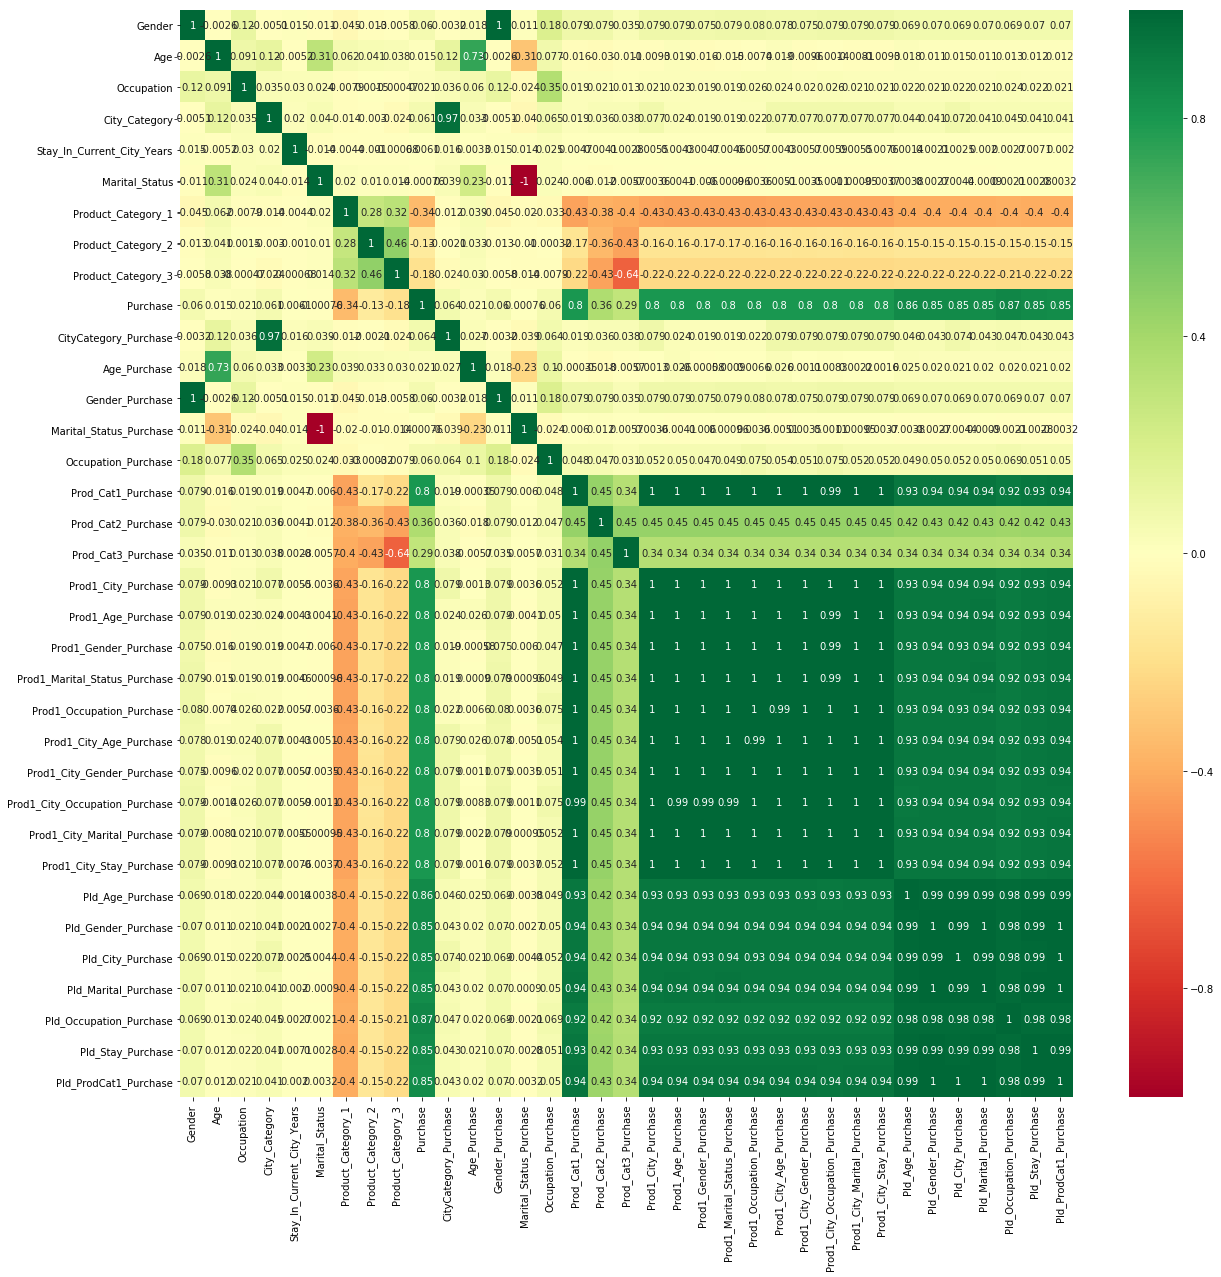

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Creating x_train , y_train and x_test , y_test from train data and test data


In [77]:
x_train = train.drop('Purchase', axis=1)
y_train = train['Purchase']

x_test = test.drop('Purchase', axis = 1)
y_test = test['Purchase']

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(440054, 34) (440054,) (110014, 34) (110014,)


In [79]:
x_train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'CityCategory_Purchase',
       'Age_Purchase', 'Gender_Purchase', 'Marital_Status_Purchase',
       'Occupation_Purchase', 'Prod_Cat1_Purchase', 'Prod_Cat2_Purchase',
       'Prod_Cat3_Purchase', 'Prod1_City_Purchase', 'Prod1_Age_Purchase',
       'Prod1_Gender_Purchase', 'Prod1_Marital_Status_Purchase',
       'Prod1_Occupation_Purchase', 'Prod1_City_Age_Purchase',
       'Prod1_City_Gender_Purchase', 'Prod1_City_Occupation_Purchase',
       'Prod1_City_Marital_Purchase', 'Prod1_City_Stay_Purchase',
       'PId_Age_Purchase', 'PId_Gender_Purchase', 'PId_City_Purchase',
       'PId_Marital_Purchase', 'PId_Occupation_Purchase', 'PId_Stay_Purchase',
       'PId_ProdCat1_Purchase'],
      dtype='object')

In [80]:
features = ['Prod_Cat1_Purchase','Prod1_City_Purchase', 'Prod1_Age_Purchase',
       'Prod1_Gender_Purchase', 'Prod1_Marital_Status_Purchase',
       'Prod1_Occupation_Purchase', 'Prod1_City_Age_Purchase',
       'Prod1_City_Gender_Purchase', 'Prod1_City_Occupation_Purchase',
       'Prod1_City_Marital_Purchase', 'Prod1_City_Stay_Purchase',
       'PId_Age_Purchase', 'PId_Gender_Purchase', 'PId_City_Purchase',
       'PId_Marital_Purchase', 'PId_Occupation_Purchase', 'PId_Stay_Purchase',
       'PId_ProdCat1_Purchase']

In [81]:
x_train = train[features]
x_test = test[features]

In [82]:
x_train.isna().sum()

Prod_Cat1_Purchase                0
Prod1_City_Purchase               0
Prod1_Age_Purchase                0
Prod1_Gender_Purchase             0
Prod1_Marital_Status_Purchase     0
Prod1_Occupation_Purchase         0
Prod1_City_Age_Purchase           0
Prod1_City_Gender_Purchase        0
Prod1_City_Occupation_Purchase    0
Prod1_City_Marital_Purchase       0
Prod1_City_Stay_Purchase          0
PId_Age_Purchase                  0
PId_Gender_Purchase               0
PId_City_Purchase                 0
PId_Marital_Purchase              0
PId_Occupation_Purchase           0
PId_Stay_Purchase                 0
PId_ProdCat1_Purchase             0
dtype: int64

In [83]:
x_test.isna().sum()

Prod_Cat1_Purchase                   0
Prod1_City_Purchase                  0
Prod1_Age_Purchase                   0
Prod1_Gender_Purchase                0
Prod1_Marital_Status_Purchase        0
Prod1_Occupation_Purchase            1
Prod1_City_Age_Purchase              0
Prod1_City_Gender_Purchase           0
Prod1_City_Occupation_Purchase       5
Prod1_City_Marital_Purchase          0
Prod1_City_Stay_Purchase             0
PId_Age_Purchase                   768
PId_Gender_Purchase                116
PId_City_Purchase                  197
PId_Marital_Purchase                97
PId_Occupation_Purchase           2891
PId_Stay_Purchase                  354
PId_ProdCat1_Purchase               48
dtype: int64

In [84]:
x_test.describe()

,Prod_Cat1_Purchase,Prod1_City_Purchase,Prod1_Age_Purchase,Prod1_Gender_Purchase,Prod1_Marital_Status_Purchase,Prod1_Occupation_Purchase,Prod1_City_Age_Purchase,Prod1_City_Gender_Purchase,Prod1_City_Occupation_Purchase,Prod1_City_Marital_Purchase,Prod1_City_Stay_Purchase,PId_Age_Purchase,PId_Gender_Purchase,PId_City_Purchase,PId_Marital_Purchase,PId_Occupation_Purchase,PId_Stay_Purchase,PId_ProdCat1_Purchase
count,110014.000000,110014.000000,110014.000000,110014.000000,110014.000000,110013.000000,110014.000000,110014.000000,110009.000000,110014.000000,110014.000000,109246.000000,109898.000000,109817.000000,109917.000000,107123.000000,109660.000000,109966.000000
mean,9286.645502,9286.564579,9286.983874,9286.638235,9286.747204,9286.567349,9285.396567,9286.981243,9286.058578,9286.509274,9286.790596,9297.915217,9288.270178,9287.935855,9287.502739,9331.823481,9289.695828,9285.629538
std,4010.828694,4021.319100,4015.725050,4011.322066,4011.066471,4016.587633,4026.271438,4022.953676,4030.588097,4021.433077,4022.990283,4313.278685,4281.518844,4287.529332,4277.319717,4372.874245,4295.469778,4270.076452
min,37.205047,36.627507,36.041284,36.847755,37.179245,31.000000,33.133333,36.586873,28.250000,34.620690,33.310345,34.615385,36.626609,35.747573,36.849315,24.000000,35.675676,36.971875
25%,6238.723311,6172.717595,6179.356401,6212.629096,6220.735794,6240.950193,6168.477096,6188.548106,6249.193933,6181.074022,6201.012761,6340.435484,6360.161616,6357.435115,6360.360465,6340.705882,6359.346154,6365.284526
50%,7497.917238,7454.964504,7523.200247,7497.400694,7524.602931,7498.231388,7567.988879,7468.919978,7615.492688,7478.459380,7489.973973,7873.913043,7816.457143,7842.305556,7805.607843,7944.755556,7860.944444,7819.235443
75%,13614.015063,13447.431162,13467.752360,13613.624132,13597.812122,13484.209390,13317.233518,13482.712768,13233.014215,13431.778586,13440.281797,13035.716578,12999.553114,13022.723684,13026.259259,13011.742857,12996.844262,13008.214876
max,19706.046557,19860.101523,20669.604265,19709.370726,19762.653949,20838.750000,21563.508197,19952.114865,21997.000000,19934.670165,20411.643750,23843.000000,21677.645161,21964.940299,21507.491935,23702.500000,23117.000000,21361.515982


In [85]:
x_test.fillna(-1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [86]:
x_test.isna().sum()

Prod_Cat1_Purchase                0
Prod1_City_Purchase               0
Prod1_Age_Purchase                0
Prod1_Gender_Purchase             0
Prod1_Marital_Status_Purchase     0
Prod1_Occupation_Purchase         0
Prod1_City_Age_Purchase           0
Prod1_City_Gender_Purchase        0
Prod1_City_Occupation_Purchase    0
Prod1_City_Marital_Purchase       0
Prod1_City_Stay_Purchase          0
PId_Age_Purchase                  0
PId_Gender_Purchase               0
PId_City_Purchase                 0
PId_Marital_Purchase              0
PId_Occupation_Purchase           0
PId_Stay_Purchase                 0
PId_ProdCat1_Purchase             0
dtype: int64

## Modelling on Train Data

In [87]:
from sklearn import preprocessing
from sklearn import neighbors
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble  import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,log_loss

#### Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 10,max_depth=800, min_samples_leaf=1500)  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test) 

In [89]:
# Root mean squared error
rmse1 = sqrt(mean_squared_error(y_test,y_pred))
rmse1

3073.9453436677504

In [90]:
print(r2_score(y_test,y_pred)*100)

62.484639634610176


#### Random Forest Regressor

In [91]:
model=RandomForestRegressor(n_estimators=200,random_state=0,max_depth=5)
model.fit(x_train,y_train)
y_pred_rfr = model.predict(x_test)

In [92]:
# Root mean squared error
rmse=sqrt(mean_squared_error(y_test,y_pred_rfr))
rmse

3050.9490944853637

In [93]:
print(r2_score(y_test,y_pred_rfr)*100)

63.04384644778436


#### KNN Regressor

In [94]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
from sklearn.neighbors import KNeighborsClassifier

rmse_val = [] 
K = 50
model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(x_train, y_train)  
y_pred_knn = model.predict(x_test) 
error = sqrt(mean_squared_error(y_test,y_pred_knn)) 
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  50 is: 2877.1702637086037


In [96]:
print(r2_score(y_test,y_pred_knn)*100)

67.13391559368259


#### Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
model = GradientBoostingRegressor(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
y_pred_gbr = model.predict(x_test)

In [99]:
print(r2_score(y_test,y_pred_gbr)*100)

64.79696664087255


## Modelling on Test Data

In [ ]:
percent_missing = test_data.isnull().sum() * 100 / len(test_data)
percent_missing

In [ ]:
test_data.fillna(-1,inplace=True)

In [ ]:
percent_missing = test_data.isnull().sum() * 100 / len(test_data)
percent_missing

In [ ]:
y_test_pred_DTR = regressor.predict(test_data[features])
y_test_pred_RFR = model.predict(test_data[features])

## Creating CSV of Output

In [ ]:
submission['Purchase'] = y_test_pred_DTR

In [ ]:
submission['Purchase'] = submission['Purchase'].astype(int)

In [ ]:
submission.to_csv("D:\Downloads\Data Science\Analytics_Vidya\Output\Black Friday Sales\BlackFridaySalesPrediction3.csv")

### K Fold

In [ ]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]